<a href="https://colab.research.google.com/github/sylvas-j/ML/blob/master/Tensorflow_works/SmartHome_ModelProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

# multi-class classification with Keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from sklearn.metrics import(
    classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
)
from sklearn.preprocessing import (
    StandardScaler, LabelBinarizer, FunctionTransformer,PolynomialFeatures, OrdinalEncoder,LabelEncoder,MinMaxScaler
)
# from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import VarianceThreshold
from keras.utils import np_utils

In [3]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor,RegressorChain
from sklearn.svm import LinearSVR

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# import mitosheet

#### For Google Colab

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Ms Imumisen/smart_home_ds.csv")

#### For Jupyter Lab

In [ ]:
data= pd.read_csv('D:\\Desktop Files\\weka data\\Ms Imumu\\hh130\\hh130.ann.features.csv')

In [ ]:
mitosheet.sheet(data)

MitoWidget(analysis_name='UUID-716c6500-92c2-499a-8c65-195f4a60998b', code_json='{"imports": "from mitosheet i…

In [ ]:
# MITO CODE START (DO NOT EDIT)

from mitosheet import * # Import necessary functions from Mito
register_analysis('UUID-716c6500-92c2-499a-8c65-195f4a60998b') # Let Mito know which analysis is being run

# Pivoted data into df2
df2 = pd.DataFrame(data={})

  
# MITO CODE END (DO NOT EDIT)

#### Data Wrangling and Processing

https://machinelearningmastery.com/data-preparation-techniques-for-machine-learning/

##### Data Cleaning: Identifying and correcting mistakes or errors in the data.
##### Feature Selection: Identifying those input variables that are most relevant to the task.
##### Data Transforms: Changing the scale or distribution of variables.
##### Feature Engineering: Deriving new variables from available data.
##### Dimensionality Reduction: Creating compact projections of the data.

In [ ]:
data.head(4)

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea,activity
0,2.0,7371.0,3.0,5722.0,1.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
1,2.0,7373.0,3.0,5723.0,2.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
2,2.0,7374.0,3.0,5496.0,1.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
3,2.0,7375.0,3.0,5496.0,1.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep


In [8]:
X_df = data.drop(labels=['activity'], axis=1)
y_df = data['activity']

In [7]:
y_df

0         Sleep
1         Sleep
2         Sleep
3         Sleep
4         Sleep
          ...  
157367    Sleep
157368    Sleep
157369    Sleep
157370    Sleep
157371    Sleep
Name: activity, Length: 157372, dtype: object

In [8]:
data.corr()

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,complexity,activityChange,areaTransitions,numDistinctSensors,sensorCount-Bathroom,sensorCount-Bedroom,sensorCount-Chair,sensorCount-DiningRoom,sensorCount-Hall,sensorCount-Ignore,sensorCount-Kitchen,sensorCount-LivingRoom,sensorCount-Office,sensorCount-OutsideDoor,sensorCount-WorkArea,sensorElTime-Bathroom,sensorElTime-Bedroom,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea
lastSensorEventHours,1.000000,0.998581,0.004958,-0.095645,-0.034804,0.200807,0.211911,0.133822,0.133822,0.148368,-0.034145,-0.005037,-0.021128,NaN,-0.112535,-0.134686,NaN,NaN,NaN,-0.047892,0.060029,0.244983,NaN,-0.010620,NaN,0.013302,0.161494,NaN,NaN,NaN,-0.148280,-0.286113,-0.266812,NaN,-0.118630,NaN
lastSensorEventSeconds,0.998581,1.000000,0.008052,-0.095057,-0.034541,0.200550,0.212061,0.132898,0.132898,0.147273,-0.035576,-0.005036,-0.022218,NaN,-0.110391,-0.135517,NaN,NaN,NaN,-0.047981,0.057927,0.245140,NaN,-0.011126,NaN,0.013728,0.161934,NaN,NaN,NaN,-0.148465,-0.285706,-0.266068,NaN,-0.118501,NaN
lastSensorDayOfWeek,0.004958,0.008052,1.000000,0.000474,0.001162,0.006574,0.005843,0.001191,0.001191,0.007354,-0.019884,-0.001008,-0.000396,NaN,0.011507,-0.009989,NaN,NaN,NaN,-0.029220,-0.005670,0.025060,NaN,-0.013449,NaN,-0.004421,-0.005140,NaN,NaN,NaN,0.000172,0.014175,0.043468,NaN,-0.015185,NaN
windowDuration,-0.095645,-0.095057,0.000474,1.000000,0.314408,-0.029632,-0.064792,0.021350,0.021350,0.036138,-0.313383,0.002748,-0.267356,NaN,-0.194275,0.135004,NaN,NaN,NaN,0.220572,-0.113131,-0.033380,NaN,0.001944,NaN,0.465764,0.354940,NaN,NaN,NaN,0.244148,0.192892,0.267309,NaN,0.471406,NaN
timeSinceLastSensorEvent,-0.034804,-0.034541,0.001162,0.314408,1.000000,-0.017921,-0.024935,0.015274,0.015274,0.031614,-0.101922,-0.142090,-0.079354,NaN,-0.067537,0.066774,NaN,NaN,NaN,0.043174,-0.038333,-0.014349,NaN,0.008017,NaN,0.131032,0.136262,NaN,NaN,NaN,0.099280,0.056365,0.083470,NaN,0.143315,NaN
prevDominantSensor1,0.200807,0.200550,0.006574,-0.029632,-0.017921,1.000000,0.477181,0.213728,0.213728,0.243117,0.075762,0.023516,0.021851,NaN,-0.272519,-0.240109,NaN,NaN,NaN,0.069521,0.182175,0.358118,NaN,0.014852,NaN,0.131014,0.191512,NaN,NaN,NaN,-0.076687,-0.222831,-0.174772,NaN,-0.032458,NaN
prevDominantSensor2,0.211911,0.212061,0.005843,-0.064792,-0.024935,0.477181,1.000000,0.152658,0.152658,0.170010,0.059542,0.012621,-0.003392,NaN,-0.132939,-0.197280,NaN,NaN,NaN,0.047996,0.131385,0.221019,NaN,0.020648,NaN,0.101285,0.151134,NaN,NaN,NaN,-0.077511,-0.225039,-0.179830,NaN,-0.044066,NaN
lastSensorID,0.133822,0.132898,0.001191,0.021350,0.015274,0.213728,0.152658,1.000000,1.000000,0.858334,0.112540,-0.036664,0.011326,NaN,-0.394281,-0.282614,NaN,NaN,NaN,0.146376,0.196547,0.424363,NaN,0.117750,NaN,0.078590,0.241835,NaN,NaN,NaN,-0.091702,-0.171262,-0.159933,NaN,-0.073881,NaN
lastSensorLocation,0.133822,0.132898,0.001191,0.021350,0.015274,0.213728,0.152658,1.000000,1.000000,0.858334,0.112540,-0.036664,0.011326,NaN,-0.394281,-0.282614,NaN,NaN,NaN,0.146376,0.196547,0.424363,NaN,0.117750,NaN,0.078590,0.241835,NaN,NaN,NaN,-0.091702,-0.171262,-0.159933,NaN,-0.073881,NaN
lastMotionLocation,0.148368,0.147273,0.007354,0.036138,0.031614,0.243117,0.170010,0.858334,0.858334,1.000000,0.122533,-0.070205,0.027712,NaN,-0.473448,-0.258489,NaN,NaN,NaN,0.110256,0.215386,0.466225,NaN,0.174744,NaN,0.102679,0.253689,NaN,NaN,NaN,-0.071910,-0.196571,-0.180780,NaN,-0.072909,NaN


In [9]:
data.corr().info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, lastSensorEventHours to sensorElTime-WorkArea
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lastSensorEventHours      25 non-null     float64
 1   lastSensorEventSeconds    25 non-null     float64
 2   lastSensorDayOfWeek       25 non-null     float64
 3   windowDuration            25 non-null     float64
 4   timeSinceLastSensorEvent  25 non-null     float64
 5   prevDominantSensor1       25 non-null     float64
 6   prevDominantSensor2       25 non-null     float64
 7   lastSensorID              25 non-null     float64
 8   lastSensorLocation        25 non-null     float64
 9   lastMotionLocation        25 non-null     float64
 10  complexity                25 non-null     float64
 11  activityChange            25 non-null     float64
 12  areaTransitions           25 non-null     float64
 13  numDistinctSensors        0 non-nu

In [10]:
corr_data = data.corr()

#### Filtering Columns with Contant Values

In [9]:
# Execute the following script to create a filter for constant features.
constant_filter = VarianceThreshold(threshold=0)
# Next, we need to simply apply this filter to our training set as shown in the following example:
constant_filter.fit(X_df)

VarianceThreshold(threshold=0)

In [10]:
# Execute the following script to see the number of non-constant features.

len(X_df.columns[constant_filter.get_support()])

25

In [12]:
# List of contants column
constant_columns = [column for column in X_df.columns
                    if column not in X_df.columns[constant_filter.get_support()]]

In [13]:
constant_columns

['numDistinctSensors',
 'sensorCount-Chair',
 'sensorCount-DiningRoom',
 'sensorCount-Hall',
 'sensorCount-Office',
 'sensorCount-WorkArea',
 'sensorElTime-Chair',
 'sensorElTime-DiningRoom',
 'sensorElTime-Hall',
 'sensorElTime-Office',
 'sensorElTime-WorkArea']

In [14]:
X_df.head(2)

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,complexity,activityChange,areaTransitions,numDistinctSensors,sensorCount-Bathroom,sensorCount-Bedroom,sensorCount-Chair,sensorCount-DiningRoom,sensorCount-Hall,sensorCount-Ignore,sensorCount-Kitchen,sensorCount-LivingRoom,sensorCount-Office,sensorCount-OutsideDoor,sensorCount-WorkArea,sensorElTime-Bathroom,sensorElTime-Bedroom,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea
0,2.0,7371.0,3.0,5722.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.498951,0.0,0.0,0.0,34.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86400.0,0.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0
1,2.0,7373.0,3.0,5723.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.710117,0.0,0.0,0.0,34.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86400.0,0.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0


In [15]:
# Finally, to remove constant features from training and test sets, we can use the transform() method of the constant_filter. 
# Execute the following script to do so:

# X_filtered = constant_filter.transform(X_df)
# test_features = constant_filter.transform(test_features)
# X_filtered.shape

# Executing this and skip transform if you want to filter quasi-constant before transform
X_df.drop(labels=constant_columns, axis=1, inplace=True)

In [16]:
X_df

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,complexity,activityChange,areaTransitions,sensorCount-Bathroom,sensorCount-Bedroom,sensorCount-Ignore,sensorCount-Kitchen,sensorCount-LivingRoom,sensorCount-OutsideDoor,sensorElTime-Bathroom,sensorElTime-Bedroom,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-OutsideDoor
0,2.0,7371.0,3.0,5722.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.498951,0.0,0.0,34.35,0.0,0.0,0.0,0.0,86400.000000,0.0,86400.000000,86400.000000,86400.000000,86400.000000
1,2.0,7373.0,3.0,5723.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.710117,0.0,0.0,34.35,0.0,0.0,0.0,0.0,86400.000000,0.0,86400.000000,86400.000000,86400.000000,86400.000000
2,2.0,7374.0,3.0,5496.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.698508,0.0,0.0,34.35,0.0,0.0,0.0,0.0,86400.000000,0.0,86400.000000,86400.000000,86400.000000,86400.000000
3,2.0,7375.0,3.0,5496.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.698326,0.0,0.0,34.35,0.0,0.0,0.0,0.0,86400.000000,0.0,86400.000000,86400.000000,86400.000000,86400.000000
4,2.0,7378.0,3.0,5416.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.693501,0.0,0.0,34.35,0.0,0.0,0.0,0.0,86400.000000,0.0,86400.000000,86400.000000,86400.000000,86400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157367,23.0,84552.0,4.0,455.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.927473,0.0,0.0,34.35,0.0,0.0,0.0,0.0,492.219250,0.0,490.229852,16025.198988,1148.163531,491.263279
157368,23.0,84607.0,4.0,510.0,55.0,0.0,0.0,1.0,1.0,1.0,0.0,0.835294,0.0,0.0,34.35,0.0,0.0,0.0,0.0,547.255265,0.0,545.265867,16080.235003,1203.199546,546.299294
157369,23.0,84608.0,4.0,510.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.835294,0.0,0.0,34.35,0.0,0.0,0.0,0.0,548.281148,0.0,546.291750,16081.260886,1204.225429,547.325177
157370,23.0,85309.0,4.0,1208.0,701.0,0.0,0.0,1.0,1.0,1.0,0.0,0.350993,0.0,0.0,34.35,0.0,0.0,0.0,0.0,1248.987680,0.0,1246.998282,16781.967418,1904.931961,1248.031709


#### Filtering Out Of Contant-filteres dataset quasi-constant

In [17]:
# Let's create our quasi-constant filter. Execute the following script to do so:
qconstant_filter = VarianceThreshold(threshold=0.01)
qconstant_filter.fit(X_df)

VarianceThreshold(threshold=0.01)

In [18]:
len(X_df.columns[qconstant_filter.get_support()])

25

In [19]:
qconstant_columns = [column for column in X_df.columns
                    if column not in X_df.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))

0


In [20]:
for column in qconstant_columns:
    print(column)

In [21]:
train_features = qconstant_filter.transform(X_df)
# test_features = qconstant_filter.transform(test_features)

train_features.shape

(157372, 25)

#### Removing Duplicate Features

In [22]:
# We will use this method to first take a transpose of our dataset as shown below:
X_T = X_df.T
X_T.shape

(25, 157372)

In [23]:
# Let's find the total number of duplicate features in our dataset using the sum() method, chained with the duplicated() method as shown below.
print(X_T.duplicated().sum())

1


In [24]:
X_T.head(2)
# unique_features.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,157332,157333,157334,157335,157336,157337,157338,157339,157340,157341,157342,157343,157344,157345,157346,157347,157348,157349,157350,157351,157352,157353,157354,157355,157356,157357,157358,157359,157360,157361,157362,157363,157364,157365,157366,157367,157368,157369,157370,157371
lastSensorEventHours,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0
lastSensorEventSeconds,7371.0,7373.0,7374.0,7375.0,7378.0,7407.0,7408.0,7414.0,7415.0,8065.0,8066.0,8092.0,8094.0,8321.0,8322.0,8499.0,8500.0,8763.0,8764.0,9912.0,9913.0,10328.0,10329.0,10626.0,10627.0,10817.0,10818.0,11360.0,11361.0,11543.0,11544.0,11545.0,11547.0,11819.0,11820.0,11853.0,11854.0,11856.0,11857.0,11862.0,...,84091.0,84092.0,84094.0,84095.0,84095.0,84096.0,84097.0,84097.0,84098.0,84101.0,84110.0,84111.0,84112.0,84112.0,84121.0,84122.0,84166.0,84167.0,84171.0,84172.0,84519.0,84519.0,84523.0,84524.0,84525.0,84525.0,84526.0,84529.0,84530.0,84530.0,84531.0,84531.0,84545.0,84546.0,84551.0,84552.0,84607.0,84608.0,85309.0,85310.0


In [25]:
unique_features = X_T.drop_duplicates(keep='first').T
# bNow, let's print the shape of our new training set without duplicate features:
unique_features.shape

(157372, 24)

In [26]:
duplicated_features = [dup_col for dup_col in X_df.columns if dup_col not in unique_features.columns]
duplicated_features

['lastSensorLocation']

#### Removing Correlated Features

In [27]:
# Execute the following script, to remove non-numeric features from the dataset.
num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(unique_features.select_dtypes(include=num_colums).columns)
unique_numeric_features = unique_features[numerical_columns]

In [28]:
# Let's first create correlation matrix for the columns in the dataset and an empty set that will contain all the correlated features. 
# Execute the following script to do so:
correlated_features = set()
correlation_matrix = unique_numeric_features.corr()

In [29]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [30]:
# len(correlated_features)
print(correlated_features)

{'lastSensorEventSeconds', 'lastMotionLocation', 'sensorElTime-OutsideDoor'}


In [31]:
# The following script removes these columns from the dataset:
unique_numeric_features.drop(labels=correlated_features, axis=1, inplace=True)

In [32]:
unique_numeric_features.shape

(157372, 21)

In [ ]:
# convert dataframe to numpy array
values = data.values
X, y = values[:, 0:36], values[:,36]
# X = X.reshape(len(X), 36, 1)

X = np.asarray(X).astype(np.float64)

In [33]:
encoder = LabelEncoder()
encoder.fit(y_df)
encoded_Y = encoder.transform(y_df)

# encoded_Y = TextLabelEncoderDummy.labelencoder(y_df)

In [34]:
# convert encoder variable to dummy variable
uniques, ids = np.unique(encoded_Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
# dummy_y = np_utils.to_categorical(encoded_Y)

# dummy_y = TextLabelEncoderDummy.encoded_to_dummy(encoded_Y)

In [35]:
dummy_y.shape, encoded_Y.shape

((157372, 28), (157372,))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(unique_numeric_features, dummy_y,test_size=0.3,random_state=42)

In [47]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,test_size=0.5,random_state=42)

In [38]:
sc = StandardScaler()
S_train = sc.fit_transform(X_train)
S_val = sc.transform(X_val)
S_test = sc.transform(X_test)

In [41]:
X_train.shape,S_train.shape,y_train.shape

((110160, 21), (110160, 21), (110160, 28))

In [43]:
# pipe1a = Pipeline([
#     ('map', mapper),
# ])

In [40]:
y_train.shape

(110160,)

In [42]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=21, activation='relu'))
    model.add(Dense(40, activation='relu'))
    # model.add(Dense(30, activation='relu'))
    # model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(28, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [43]:

estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=100, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, S_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# _, accuracy = model.evaluate(x, y)
# print("Model accuracy: %.2f"% (accuracy*100))

Baseline: 71.12% (0.81%)


In [ ]:
results.predict(X_val)

In [44]:
# X_train, X_test, y_train, y_test = train_test_split(unique_numeric_features, encoded_Y,test_size=0.3,random_state=42)

# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,test_size=0.5,random_state=42)

In [48]:
model = baseline_model()
# history = model.fit(S_train, y_train, epochs=10, batch_size=100, verbose=1)
history = model.fit(S_train, y_train, batch_size=100, epochs=10, verbose=0)
# 4. evaluate network
score  = model.evaluate(S_val, y_val, verbose=0)
print(score )
# 5. make predictions
predictions = model.predict(S_test, verbose=0)
print(predictions)


[0.7823142409324646, 0.7129543423652649]
[[8.2509632e-06 4.5391264e-08 9.8293554e-11 ... 7.7524518e-08
  5.9393317e-11 2.3810510e-07]
 [6.7926390e-05 1.3138548e-13 4.9663313e-09 ... 4.6818703e-05
  8.4954064e-07 3.0067691e-04]
 [4.8873818e-24 1.0929761e-30 3.6874928e-21 ... 3.6196006e-13
  4.3497882e-13 6.8880512e-10]
 ...
 [4.2691096e-03 1.7579396e-04 6.5256751e-07 ... 9.7241274e-05
  1.2915657e-05 5.4052129e-04]
 [4.4314314e-14 1.4405803e-26 1.8408403e-04 ... 6.0292976e-05
  1.1695481e-02 1.7323933e-07]
 [1.4582713e-10 3.0253915e-08 4.2891729e-06 ... 1.0357768e-03
  3.6071864e-07 6.2758639e-03]]


#### Reverse Predictions variables to categorical variables

In [49]:
# Reverse dummy variable to encoder variable
reverse_dummy_predicted = uniques[predictions.argmax(1)]
print(pd.unique(reverse_dummy_predicted).shape)

# reverse_dummy_predicted =TextLabelEncoderDummy.reverse_dummy_to_encoded(predictions)

# reverse encoded Y to categorical variables
reverse_encoded_y_predicted = encoder.inverse_transform(reverse_dummy_predicted)
reverse_encoded_y_predicted

# reverse_encoded_y_predicted = TextLabelEncoderDummy.reverse_encoded_to_text(reverse_dummy_predicted)

(22,)


array(['Entertain_Guests', 'Other_Activity', 'Enter_Home', ...,
       'Entertain_Guests', 'Other_Activity', 'Other_Activity'],
      dtype=object)

In [50]:
reverse_test_dummy = uniques[y_test.argmax(1)]
print(pd.unique(reverse_test_dummy).shape)

# reverse_test_dummy =TextLabelEncoderDummy.reverse_dummy_to_encoded(y_test)


reverse_encoded_y_test = encoder.inverse_transform(reverse_test_dummy)
reverse_encoded_y_test

# reverse_encoded_y_test = TextLabelEncoderDummy.reverse_encoded_to_text(reverse_test_dummy)

(28,)


array(['Entertain_Guests', 'Other_Activity', 'Enter_Home', ...,
       'Entertain_Guests', 'Other_Activity', 'Other_Activity'],
      dtype=object)

In [99]:
TextLabelEncoderDummy.labelencoder(y_df)

array([19, 19, 19, ..., 19, 19, 19])

####Result Analysis

https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/

#####Classification Report

In [97]:
# matrix = classification_report(actual,predicted,labels=[1,0])
classification_reportx(reverse_encoded_y_test,reverse_encoded_y_predicted)

                       precision    recall  f1-score   support

     Entertain_Guests       0.72      0.89      0.79      6271
       Other_Activity       0.70      0.67      0.68      7035
           Enter_Home       0.83      0.76      0.79       274
     Personal_Hygiene       0.65      0.59      0.61      1932
                Groom       0.56      0.56      0.56       552
             Watch_TV       0.68      0.81      0.74      2127
                Sleep       0.93      0.95      0.94      1824
     Sleep_Out_Of_Bed       0.70      0.56      0.62       168
               Toilet       0.49      0.53      0.51       778
                 Cook       0.87      0.54      0.67        48
                Dress       0.54      0.35      0.43       456
Bed_Toilet_Transition       0.84      0.94      0.89       292
     Work_On_Computer       0.64      0.40      0.50       502
        Work_At_Table       0.56      0.21      0.31        47
                Drink       0.46      0.17      0.25  

In [52]:
from sklearn.metrics import precision_score
precision = precision_score(reverse_encoded_y_test, reverse_encoded_y_predicted, average='micro')
print('Precision: %.3f' % precision)

Precision: 0.707


In [128]:
pd.unique(reverse_encoded_y_test)

array(['Entertain_Guests', 'Other_Activity', 'Enter_Home', 'Groom',
       'Personal_Hygiene', 'Toilet', 'Watch_TV', 'Sleep', 'Leave_Home',
       'Drink', 'Work_On_Computer', 'Cook', 'Phone',
       'Bed_Toilet_Transition', 'Bathe', 'Dress', 'Work',
       'Sleep_Out_Of_Bed', 'Read', 'Wash_Dishes', 'Relax', 'Eat',
       'Step_Out', 'Work_At_Table', 'Eat_Lunch', 'Eat_Breakfast',
       'Cook_Breakfast', 'Cook_Lunch'], dtype=object)

#####Confusion matrix

In [59]:
pd.crosstab(reverse_encoded_y_test, reverse_encoded_y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Bathe,Bed_Toilet_Transition,Cook,Cook_Lunch,Dress,Drink,Eat_Breakfast,Enter_Home,Entertain_Guests,Groom,Leave_Home,Other_Activity,Personal_Hygiene,Phone,Read,Relax,Sleep,Sleep_Out_Of_Bed,Toilet,Watch_TV,Work_At_Table,Work_On_Computer,All
True,,,,,,,,,,,,,,,,,,,,,,,
Bathe,3,0,0,0,0,0,0,0,5,9,0,2,17,0,0,0,0,0,5,0,0,0,41
Bed_Toilet_Transition,0,274,0,0,0,0,0,0,0,6,0,1,3,0,0,0,6,0,2,0,0,0,292
Cook,0,0,26,0,0,3,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,48
Cook_Breakfast,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Cook_Lunch,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,5
Dress,0,0,0,0,161,0,0,0,43,13,0,203,17,0,0,2,10,0,7,0,0,0,456
Drink,0,0,3,0,0,28,0,0,26,0,0,107,0,0,0,0,0,0,0,0,3,0,167
Eat,0,0,0,0,0,1,0,0,4,0,0,9,0,0,0,0,0,0,0,10,0,0,24
Eat_Breakfast,0,0,0,0,0,0,1,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,7


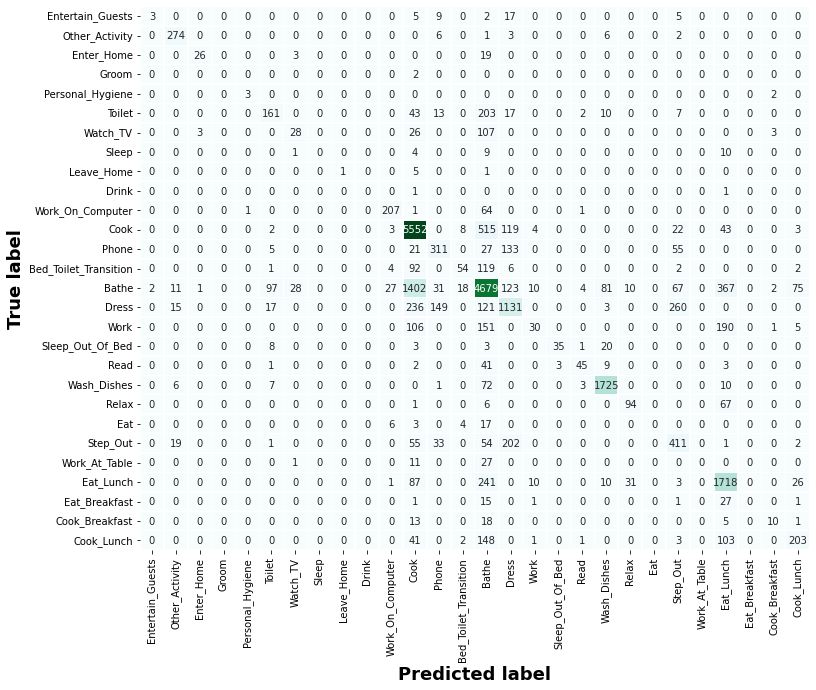

In [90]:
# matrix = classification_report(actual,predicted,labels=[1,0])
def classification_reportx(y_test,y_predicted):
  matrix = classification_report(y_test,y_predicted, labels=pd.unique(y_predicted))
  # matrix = classification_report(reverse_encoded_y_test,reverse_encoded_y_predicted, labels=pd.unique(reverse_encoded_y_predicted))
  print(matrix)
# classification_reportx(reverse_encoded_y_test,reverse_encoded_y_predicted)


# confusion_matrix(reverse_encoded_y_test, reverse_encoded_y_predicted)
def confusion_matrixx(y_test, y_pred,figsize1,figsize2):
  %matplotlib inline
  # fig, ax = plt.subplots(figsize=(12,10))
  fig, ax = plt.subplots(figsize=(figsize1,figsize2))
  # cm = confusion_matrix(reverse_encoded_y_test, reverse_encoded_y_predicted)
  cm = confusion_matrix(y_test, y_pred)
  # df_cm = pd.DataFrame(cm, index=pd.unique(reverse_encoded_y_test), columns=pd.unique(reverse_encoded_y_test))
  df_cm = pd.DataFrame(cm, index=pd.unique(y_test), columns=pd.unique(y_test))
  ax = sns.heatmap(df_cm,  cbar = False, cmap="BuGn", annot=True, fmt="d", linewidths=.5, ax=ax)
  # plt.setp(ax.get_xticklabels(), rotation=45)
  plt.ylabel('True label', fontweight='bold', fontsize = 18)
  plt.xlabel('Predicted label', fontweight='bold', fontsize = 18) 
  plt.show()
# confusion_matrixx(reverse_encoded_y_test, reverse_encoded_y_predicted,12,10)

# class for Y convertions
class TextLabelEncoderDummy:

  def labelencoder(y_df):
    encoder = LabelEncoder()
    encoder.fit(y_df)
    encoded_Y = encoder.transform(y_df)
    return encoded_Y


  def encoded_to_dummy(encoded_Y):
    # convert encoder variable to dummy variable
    uniques, ids = np.unique(encoded_Y, return_inverse=True)
    dummy_y = np_utils.to_categorical(ids, len(uniques))
    # dummy_y = np_utils.to_categorical(encoded_Y)
    return dummy_y


  def reverse_dummy_to_encoded(y_test):
    reverse_dummy = uniques[y_test.argmax(1)]
    return reverse_dummy


  def reverse_encoded_to_text(reverse_dummy):
    reverse_encoded = encoder.inverse_transform(reverse_dummy)
    return reverse_encoded

In [ ]:
df_cm

In [100]:
for i in range(len(reverse_encoded_y_test)):
    print("Test: %s -------- Predicted: (%s)" % (reverse_encoded_y_test[i], reverse_encoded_y_predicted[i]))

# pred = list()
# for i in range(4):
#     pred.append(uniques[predictions.argmax(1)])

Streaming output truncated to the last 5000 lines.
Test: Other_Activity -------- Predicted: (Other_Activity)
Test: Other_Activity -------- Predicted: (Entertain_Guests)
Test: Work_On_Computer -------- Predicted: (Work_On_Computer)
Test: Entertain_Guests -------- Predicted: (Entertain_Guests)
Test: Watch_TV -------- Predicted: (Other_Activity)
Test: Entertain_Guests -------- Predicted: (Leave_Home)
Test: Toilet -------- Predicted: (Personal_Hygiene)
Test: Entertain_Guests -------- Predicted: (Entertain_Guests)
Test: Other_Activity -------- Predicted: (Other_Activity)
Test: Personal_Hygiene -------- Predicted: (Personal_Hygiene)
Test: Watch_TV -------- Predicted: (Watch_TV)
Test: Personal_Hygiene -------- Predicted: (Personal_Hygiene)
Test: Other_Activity -------- Predicted: (Other_Activity)
Test: Sleep -------- Predicted: (Sleep)
Test: Entertain_Guests -------- Predicted: (Entertain_Guests)
Test: Other_Activity -------- Predicted: (Other_Activity)
Test: Toilet -------- Predicted: (Toile

In [72]:
pd.unique(pred).shape

(1,)

In [ ]:
mp = ".\\Models\\banknote_model.h5"
model.save(mp)

In [ ]:
print(predictions, y_test)

In [66]:
for layer in model.layers:
    weights = layer.get_weights()

# from keras.utils import plot_model
# plot_model(model, to_file='/tmp/model.png', show_shapes=True,)


In [ ]:
def run_reg_withCrossV(X, y):
    model=DecisionTreeRegressor()
#     lr = LinearRegression()
#     lr = KNeighborsRegressor()
#     lr = lr.fit(trainx, y_train)
    model = LinearSVR()
    # define the direct multioutput wrapper model
    wrapper = MultiOutputRegressor(model)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#     n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

    # force the scores to be positive
    n_scores = np.absolute(n_scores)
    # summarize performance
    print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
#     print(f"DecisionTreeRegressor Test socre {model.score(testx, y_test)}")
#     Y_pred2 = model.predict(testx)

def run_reg_makePred(X, y,X_t):
    model = LinearSVR()
    # define the direct multioutput wrapper model
    wrapper = RegressorChain(model)
    # fit the model on the whole dataset
    wrapper.fit(X, y)
    # make a single prediction
    row = [0.0,-0.294750,-0.995985,2.058876]
    yhat = wrapper.predict(X_t)
    # summarize the prediction
    print('Predicted: %s' % yhat[0])
    


In [58]:
# Now we can check the model’s performance on test data:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

array([0.71096587, 0.70778865, 0.71423382, 0.71895427, 0.71868193,
       0.70942265, 0.7243101 , 0.71033043, 0.70933187, 0.71169209])

In [ ]:
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output


In [ ]:
from google.colab import files
unique_numeric_features.to_csv('unique_numeric_features.csv') 
files.download("unique_numeric_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# qr52323694